Importing libraries

In [1]:
# Data Manipulation and Linear Algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve
from sklearn.decomposition import PCA

from sklearn import tree, linear_model, ensemble

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

Load data and Overview

In [2]:
data = pd.read_csv("./input/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Drop time column

In [4]:
data.drop("Time", axis=1, inplace=True)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Prepare data

Dimensionality Reduction


In [6]:
# Reducing the Number of Features in the Dataset using PCA
pca = PCA(2)
pca_dataframe = pd.DataFrame(pca.fit_transform(data.iloc[:, :29]), columns=["PCA1", "PCA2"])


In [7]:
full_data = pd.concat([pca_dataframe, data.iloc[:, 29:]], axis=1)
full_data

,PCA1,PCA2,Class
0,61.271382,1.319496,0
1,-85.661826,-1.043753,0
2,290.316696,0.810866,0
3,35.151659,0.928279,0
4,-18.360281,1.317213,0
...,...,...,...
284802,-87.586281,13.128837,0
284803,-63.560584,0.876689,0
284804,-20.470739,-1.970618,0
284805,-78.350638,0.408234,0


Stratified Train Test Split


Evenly Spreading the Dependent Variable "status" in Train and Test set


In [8]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(full_data, full_data['Class']):
    train = full_data.loc[train_index]
    test = full_data.loc[test_index]

In [9]:

X_train = train.drop("Class", axis=1)
y_train = train["Class"]

X_test = test.drop("Class", axis=1)
y_test = test["Class"]

Modeling

Dataframe to store all the accuracy scores for Comparison and Analysis


In [10]:

MLA_compare = pd.DataFrame()

row_index = 0

def MLA_testing(MLA, X_train, X_test, y_train, y_test):  
    global row_index
    
    # Training The Model
    MLA.fit(X_train, y_train)

    # KFold Accuracies on Training Data
    kfold_accuracy = cross_val_score(estimator = MLA, X = X_train, y = y_train, cv = 10, n_jobs=-1)
    print("K-Fold Accuracies:\n", kfold_accuracy, "\n")
    
    # Prediction on Testing Data
    y_pred = cross_val_predict(estimator = MLA, X = X_test, y = y_test, cv = 10, n_jobs=-1)
    
    # Accuracy for y_test and y_pred
    classifier_accuracy_score = accuracy_score(y_test, y_pred)
    print("Accuracy Score:\n", classifier_accuracy_score, "\n")
    
    # Confusion Matrix
    conf_mtx = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_mtx, "\n")
    
    # Classification Report
    class_rep = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_rep, "\n")
    
    # Precision - Recall Curve
    yhat = MLA.predict_proba(X_test)
    no_skill = len(full_data.Class[full_data.Class==1]) / len(full_data.Class)
    precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
    
    plt.figure(dpi=100, figsize=(15, 6))
    plt.subplot(121)
    sns.lineplot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    sns.lineplot(recall, precision, marker='.', label=MLA.__class__.__name__)
    plt.title("Recall vs Precision Curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    
    # ROC Curve
    plt.subplot(122)
    sns.lineplot([0, 1], [0, 1], linestyle='--', label='No Skill')
    fpr, tpr, _ = roc_curve(y_test, yhat[:, 1])
    sns.lineplot(fpr, tpr, marker='.', label=MLA.__class__.__name__)
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Saving Data in Dataframe
    MLA_name = MLA.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
    MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

    print(MLA_name, "Done")
    
    row_index+=1

RandomForestClassifier

K-Fold Accuracies:
 [0.99850779 0.99859557 0.99824446 0.99828835 0.99842001 0.99841994
 0.99859551 0.99846383 0.99841994 0.99833216] 

Accuracy Score:
 0.9982444436641972 

Confusion Matrix:
 [[56854    10]
 [   90     8]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.08      0.14        98

    accuracy                           1.00     56962
   macro avg       0.72      0.54      0.57     56962
weighted avg       1.00      1.00      1.00     56962
 



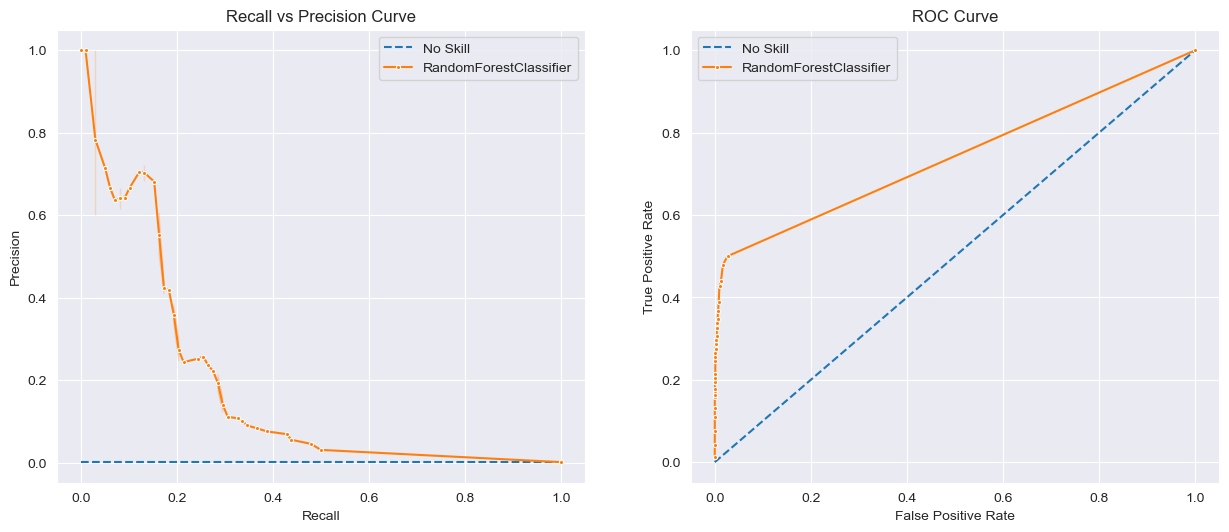

In [11]:
rf_clf = ensemble.RandomForestClassifier()

MLA_testing(rf_clf, X_train, X_test, y_train, y_test)

GradientBoostingClassifier


RandomForestClassifier Done
K-Fold Accuracies:
 [0.99824446 0.99837612 0.99811279 0.99820057 0.99828835 0.99824438
 0.99828827 0.99824438 0.99833216 0.99820049] 

Accuracy Score:
 0.997559776693234 

Confusion Matrix:
 [[56811    53]
 [   86    12]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.18      0.12      0.15        98

    accuracy                           1.00     56962
   macro avg       0.59      0.56      0.57     56962
weighted avg       1.00      1.00      1.00     56962
 



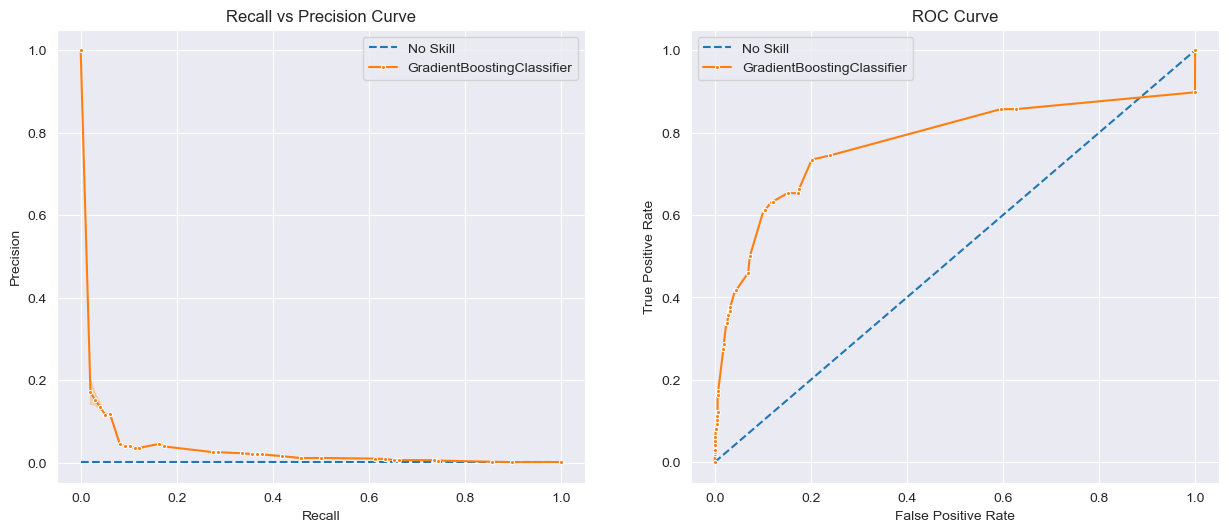

GradientBoostingClassifier Done


In [12]:
gb_clf = ensemble.GradientBoostingClassifier()

MLA_testing(gb_clf, X_train, X_test, y_train, y_test)

LogisticRegression


K-Fold Accuracies:
 [0.99824446 0.99833224 0.99815668 0.99815668 0.99820057 0.99833216
 0.99824438 0.99837605 0.99820049 0.99824438] 

Accuracy Score:
 0.9982268881008391 

Confusion Matrix:
 [[56857     7]
 [   94     4]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.36      0.04      0.07        98

    accuracy                           1.00     56962
   macro avg       0.68      0.52      0.54     56962
weighted avg       1.00      1.00      1.00     56962
 



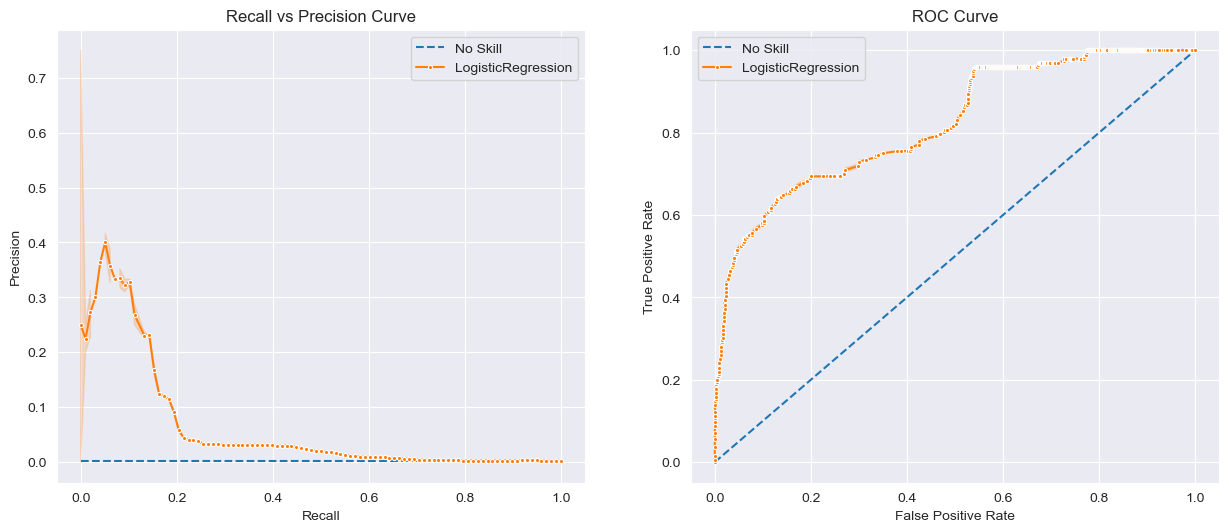

LogisticRegression Done


In [13]:
lr_clf = linear_model.LogisticRegression()

MLA_testing(lr_clf, X_train, X_test, y_train, y_test)

SGDClassifier


K-Fold Accuracies:
 [0.99828835 0.99833224 0.99824446 0.99824446 0.99824446 0.99828827
 0.99828827 0.99828827 0.99828827 0.99828827] 

Accuracy Score:
 0.9982795547909132 

Confusion Matrix:
 [[56861     3]
 [   95     3]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.50      0.03      0.06        98

    accuracy                           1.00     56962
   macro avg       0.75      0.52      0.53     56962
weighted avg       1.00      1.00      1.00     56962
 



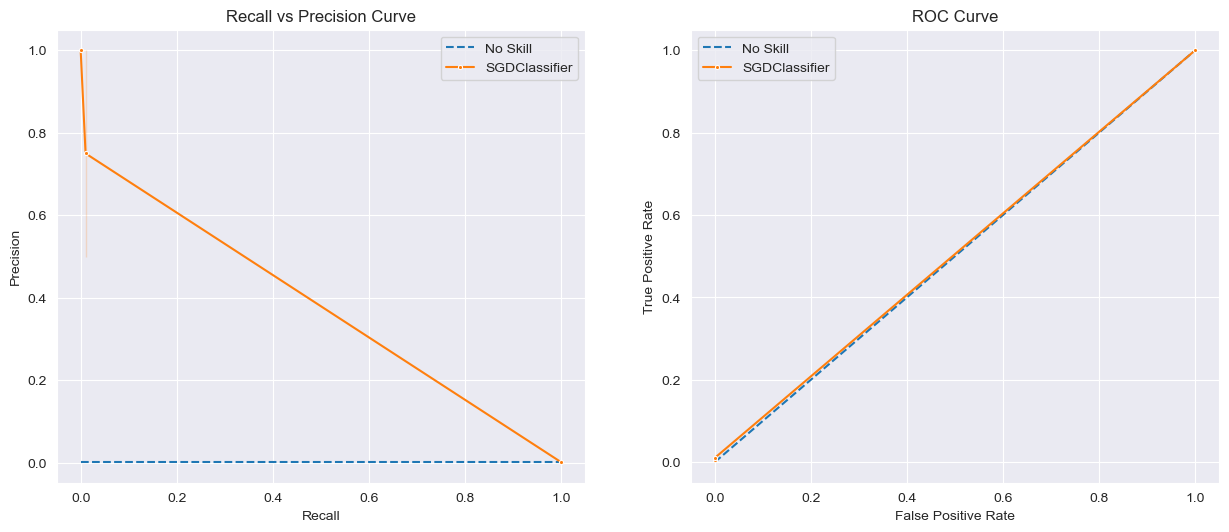

SGDClassifier Done


In [14]:
sgf_clf = linear_model.SGDClassifier(loss="log")

MLA_testing(sgf_clf, X_train, X_test, y_train, y_test)

DecisionTreeClassifier


K-Fold Accuracies:
 [0.99714725 0.9969278  0.99697169 0.99723502 0.99749835 0.99692767
 0.99767381 0.9972349  0.9972349  0.99701545] 

Accuracy Score:
 0.9967171096520487 

Confusion Matrix:
 [[56764   100]
 [   87    11]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.10      0.11      0.11        98

    accuracy                           1.00     56962
   macro avg       0.55      0.56      0.55     56962
weighted avg       1.00      1.00      1.00     56962
 



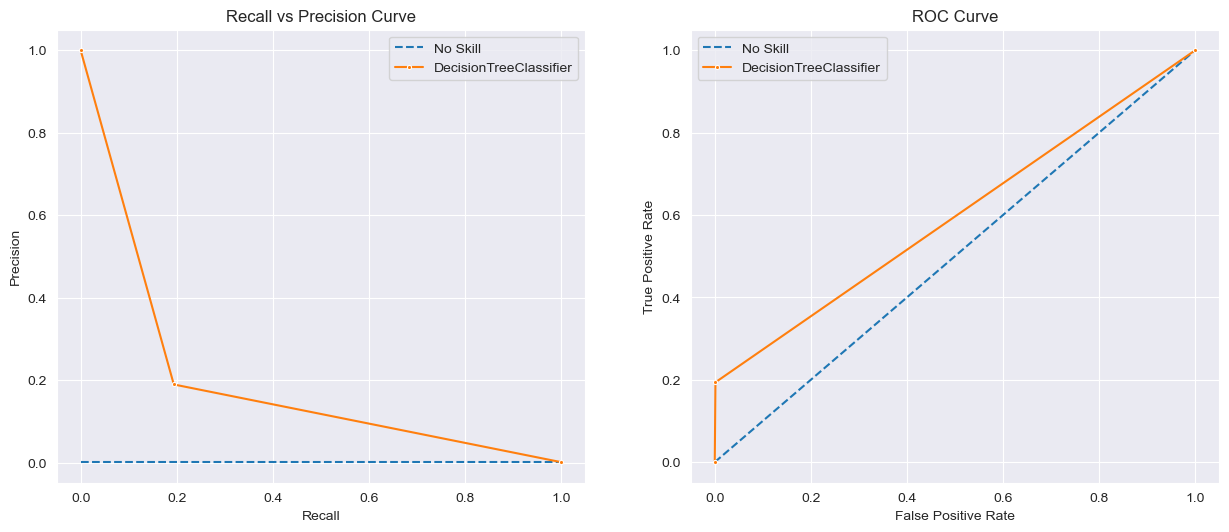

DecisionTreeClassifier Done


In [15]:
dt_clf = tree.DecisionTreeClassifier()

MLA_testing(dt_clf, X_train, X_test, y_train, y_test)

Comparing Algorithm's Performance


In [17]:
MLA_compare = MLA_compare.sort_values(by="K-Fold Accuracy", ascending=False).reset_index(drop=True)
MLA_compare


,MLA Name,Accuracy Score,K-Fold Accuracy
0,RandomForestClassifier,99.824444,99.842876
1,SGDClassifier,99.827955,99.827953
2,GradientBoostingClassifier,99.755978,99.825320
3,LogisticRegression,99.822689,99.824881
4,DecisionTreeClassifier,99.671711,99.718668


reference https://www.kaggle.com/datarohitingole/fraud-detection-99-accuracy-multiple-models/notebook